### TTim example of pumping test analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ttim import *

Load data of two observation wells

In [2]:
drawdown = np.loadtxt('data/oudekorendijk_h30.dat')
to1 = drawdown[:,0] / 60 / 24
ho1 = -drawdown[:,1]
ro1 = 30

drawdown = np.loadtxt('data/oudekorendijk_h90.dat')
to2 = drawdown[:,0] / 60 / 24
ho2 = -drawdown[:,1]
ro2 = 90

Pumping discharge

In [3]:
Qo = 788

Create model

In [4]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


Create calibration object, add parameters and first series. Fit the model. The chi-square value is the sum of squared residuals at the optimum.

In [5]:
cal = Calibrate(ml)
cal.parameter(name='kaq0', initial=10)
cal.parameter(name='Saq0', initial=1e-4)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit()

............................[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 34
    # variables        = 2
    chi-square         = 0.03408
    reduced chi-square = 0.00106
    Akaike info crit   = -230.78781
    Bayesian info crit = -227.73509
[[Variables]]
    kaq0:   68.6392795 +/- 1.438083 (2.10%) (init= 10)
    Saq0:   1.6072e-05 +/- 1.58e-06 (9.84%) (init= 0.0001)
[[Correlations]] (unreported correlations are <  0.100)
    C(kaq0, Saq0)                = -0.891


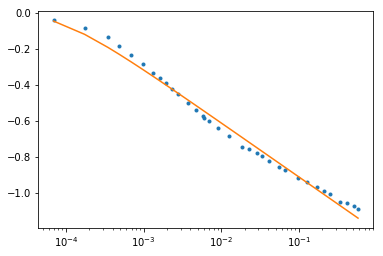

In [6]:
h = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='observed')
plt.semilogx(to1, h[0], label='model')

### Specify $S$ rather than $S_s$

In [7]:
cal = Calibrate(ml)
cal.parameter(name='kaq0', initial=10)
cal.parameter(name='S', par=ml.aq.Saq, layer=0, initial=1e-4)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit()

...............................[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 34
    # variables        = 2
    chi-square         = 0.03408
    reduced chi-square = 0.00106
    Akaike info crit   = -230.78672
    Bayesian info crit = -227.73400
[[Variables]]
    kaq0:   68.6407549 +/- 1.438564 (2.10%) (init= 10)
    S:      0.00011249 +/- 1.11e-05 (9.85%) (init= 0.0001)
[[Correlations]] (unreported correlations are <  0.100)
    C(kaq0, S)                   = -0.891


### Add wellbore storage

In [8]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, rc=0.2, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


In [9]:
cal = Calibrate(ml)
cal.parameter(name='kaq0', initial=10)
cal.parameter(name='Saq0', initial=1e-4)
cal.parameter(name='rc', par=w.rc, initial=0.2, pmin=0, pmax=0.5)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit()

.............................................[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 34
    # variables        = 3
    chi-square         = 0.00831
    reduced chi-square = 0.00027
    Akaike info crit   = -276.75814
    Bayesian info crit = -272.17906
[[Variables]]
    kaq0:   80.4976026 +/- 1.711369 (2.13%) (init= 10)
    Saq0:   5.6808e-06 +/- 8.14e-07 (14.32%) (init= 0.0001)
    rc:     0.28424478 +/- 0.016790 (5.91%) (init= 0.2)
[[Correlations]] (unreported correlations are <  0.100)
    C(kaq0, Saq0)                = -0.974
    C(Saq0, rc)                  = -0.867
    C(kaq0, rc)                  =  0.825


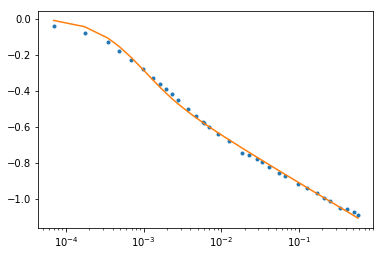

In [10]:
h = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='observed')
plt.semilogx(to1, h[0], label='model')

### Two observation wells

In [11]:
cal = Calibrate(ml)
cal.parameter(name='kaq0', initial=10)
cal.parameter(name='Saq0', initial=1e-4)
cal.parameter(name='rc', par=w.rc, initial=0.2, pmin=0, pmax=0.5)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.series(name='obs2', x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit()

..............................................................[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 69
    # variables        = 3
    chi-square         = 0.17291
    reduced chi-square = 0.00262
    Akaike info crit   = -407.24538
    Bayesian info crit = -400.54306
[[Variables]]
    kaq0:   66.0904266 +/- 1.770166 (2.68%) (init= 10)
    Saq0:   2.5407e-05 +/- 2.75e-06 (10.82%) (init= 0.0001)
    rc:     0.00032549 +/- 3.653742 (1122539.25%) (init= 0.2)
[[Correlations]] (unreported correlations are <  0.100)
    C(kaq0, Saq0)                = -0.868
    C(Saq0, rc)                  = -0.475
    C(kaq0, rc)                  =  0.336


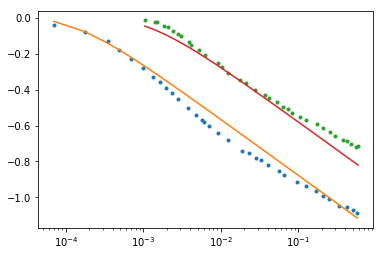

In [12]:
h1 = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='obs1')
plt.semilogx(to1, h1[0], label='model')
h2 = ml.head(ro2, 0, to2, 0)
plt.semilogx(to2, ho2, '.', label='obs2')
plt.semilogx(to2, h2[0], label='model')